<a href="https://colab.research.google.com/github/auraauliaalkhomisi2103-ops/UAS-MachineLearning-ForestFires-Aura-Aulia/blob/main/analisis_kebakaran_hutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Library berhasil di-import.
✅ Dataset berhasil dimuat dari GitHub.

--- 5 Baris Pertama Data ---
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

✅ Model berhasil dilatih.

--- Evaluasi Model ---
Mean Absolute Error (MAE): 19.88 hektar


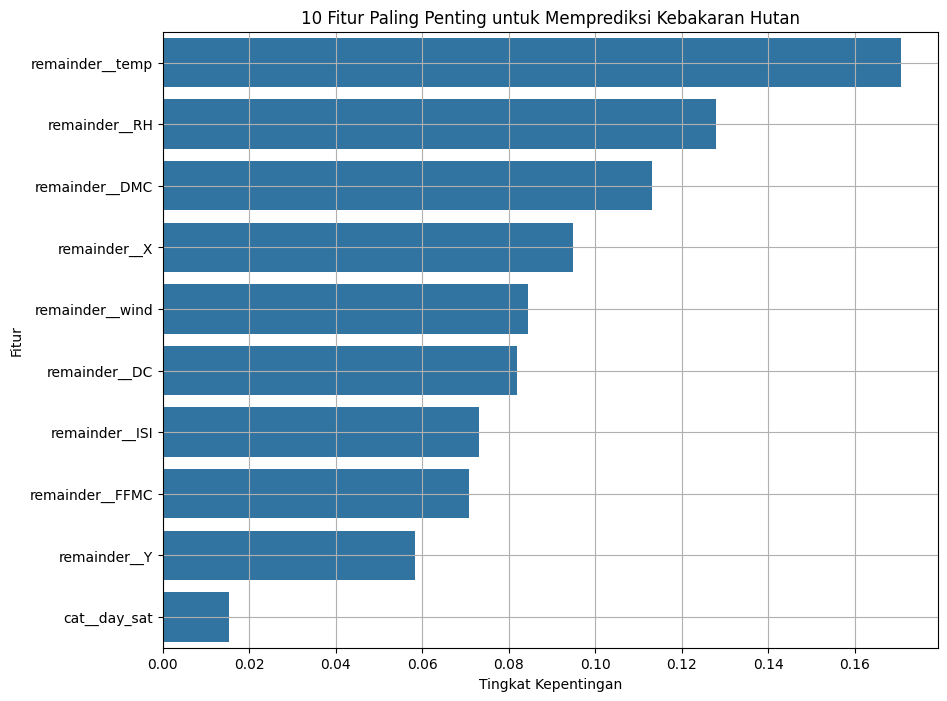


Analisis selesai!


In [2]:
# ==============================================================================
# TUGAS UAS MACHINE LEARNING: PREDIKSI LUAS KEBAKARAN HUTAN
# NAMA: Aura Aulia Alkhomisi
# NPM: 227006516044
# ==============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Library berhasil di-import.")

# MEMUAT DATA DARI GITHUB
# Ganti 'NAMA_USER' dengan username GitHub-mu!
username = 'auraauliaalkhomisi2103-ops'
repo_name = 'UAS-MachineLearning-ForestFires-Aura-Aulia'
file_path = f'https://raw.githubusercontent.com/{username}/{repo_name}/main/dataset/forestfires.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil dimuat dari GitHub.")
    print("\n--- 5 Baris Pertama Data ---")
    print(df.head())
except Exception as e:
    print(f"❌ ERROR: Gagal memuat data. Periksa kembali URL. Error: {e}")

# PREPROCESSING DATA
# Mengubah kolom 'month' dan 'day' menjadi kategori agar urutannya benar
df['month'] = pd.Categorical(df['month'], categories=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], ordered=True)
df['day'] = pd.Categorical(df['day'], categories=['mon','tue','wed','thu','fri','sat','sun'], ordered=True)

# Memisahkan fitur (X) dan target (y)
X = df.drop('area', axis=1)
y = df['area']

# Distribusi 'area' sangat miring (banyak nilai 0).
y_log = np.log1p(y)

#  MEMBUAT PIPELINE UNTUK TRANSFORMASI DAN MODEL
categorical_features = ['month', 'day']

# Buat transformer untuk mengubah data kategorikal menjadi angka (OneHotEncoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Buat pipeline yang menggabungkan preprocessor dan model Regresi
# RandomForestRegressor adalah model yang kuat untuk masalah ini
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# MEMBAGI DATA DAN MELATIH MODEL
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Latih model dengan data training
model.fit(X_train, y_train_log)
print("\n✅ Model berhasil dilatih.")

# MEMBUAT PREDIKSI DAN EVALUASI
# Lakukan prediksi pada data test
y_pred_log = model.predict(X_test)

# Kembalikan hasil prediksi dari log ke skala aslinya
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test_log)

# Hitung Mean Absolute Error (MAE)
# "Rata-rata, prediksi model meleset sekian hektar dari nilai sebenarnya"
mae = mean_absolute_error(y_test_real, y_pred)
print(f"\n--- Evaluasi Model ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} hektar")

# ANALISIS FITUR PENTING
feature_names_raw = model.named_steps['preprocessor'].get_feature_names_out()
importances = model.named_steps['regressor'].feature_importances_

feature_importance_df = pd.DataFrame({'feature': feature_names_raw, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('10 Fitur Paling Penting untuk Memprediksi Kebakaran Hutan')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.grid(True)
plt.show()

print("\nAnalisis selesai!")